# Importing libraries.

In [340]:
import numpy as np 
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# Importing DataSet

In [341]:
df = pd.read_csv('TAB_TEST_PY.csv')
Score = df['Scores']

In [354]:
df

,will_default,RepDate_end,DealID,balance_deal_sum,mob,max_dpd_1,max_dpd_3,max_dpd_6,max_dpd_12,mnths_snc_dpd_gt_0,...,prc_of_month_with_DPD_grt_0_3_months,prc_of_month_with_DPD_grt_0_6_months,prc_of_month_with_DPD_grt_0_12_months,avg_bal_1_avg_bal_3,avg_bal_1_avg_bal_6,avg_bal_1_avg_bal_12,avg_bal_1_3_avg_bal_4_6,avg_arr_1_avg_bal_1,avg_arr_3_avg_bal_3,avg_arr_6_avg_bal_6
0,0,2019-03-31,LD1710900620,0.4339,15,0,0,4,11,4,...,0.00,16.67,16.67,0.9347,0.8531,0.7305,0.8393,0.0,0.0,0.0000
1,0,2019-03-31,LD1820800442,0.3456,8,0,9,12,8,2,...,33.33,50.00,33.33,0.8037,0.6076,0.5035,0.6077,0.0,0.0,0.0249
2,0,2019-02-28,LD1727800430,0.7884,14,0,0,0,11,-9999,...,0.00,0.00,0.00,0.9828,0.9592,0.9168,0.9531,0.0,0.0,0.0000
3,0,2018-07-31,LD1506300322,0.4322,7,4,4,16,7,0,...,100.00,100.00,100.00,0.9579,0.8949,0.8644,0.8766,0.0,0.0,0.0084
4,0,2019-03-31,LD1819900520,0.8075,8,0,0,0,8,-9999,...,0.00,0.00,0.00,0.9698,0.9284,0.8912,0.9182,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310301,0,2018-12-31,LD1727800550,0.6904,12,0,0,2,11,5,...,0.00,16.67,8.33,0.9662,0.9206,0.8452,0.9098,0.0,0.0,0.0000
310302,0,2018-12-31,LD1729600385,0.5815,12,0,0,0,11,-9999,...,0.00,0.00,0.00,0.9475,0.8797,0.7735,0.8664,0.0,0.0,0.0000
310303,0,2018-06-30,LD1705500030,0.6122,6,0,0,0,6,-9999,...,0.00,0.00,0.00,0.9582,0.9027,0.8859,0.8906,0.0,0.0,0.0000
310304,0,2018-11-30,LD1603200311,0.1937,11,0,0,0,11,-9999,...,0.00,0.00,0.00,0.8623,0.7182,0.5451,0.7137,0.0,0.0,0.0000


In [342]:
df['RepDate_end'] = pd.to_datetime(df['RepDate_end'],format='%Y%m%d', errors='ignore')
df['RepDate_end'] = df['RepDate_end'].apply(str)
df['RepDate_end'] = df['RepDate_end'].apply(lambda x:x.split(' 00')[0])

In [343]:
df1 = df.iloc[:,0:21]
df = pd.concat([df['will_default'],df1],axis = 1)

In [344]:
df['balance_deal_sum'].fillna(df['balance_deal_sum'].median(),inplace = True)

# PD model creation

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , RepeatedStratifiedKFold , cross_val_score , RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score ,roc_auc_score ,classification_report , roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc

In [346]:
X = df.drop(['will_default','RepDate_end','DealID'],axis = 1)
y = df['will_default']

In [347]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
model = LogisticRegression(max_iter=975, class_weight = 'balanced',penalty = 'l2',solver = 'lbfgs',C = 1000).fit(X_train,y_train)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(model,X_train, y_train, scoring = 'roc_auc', cv = cv)

In [348]:
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

In [349]:
AUROC , GINI

(0.9235450295611213, 0.8470900591222426)

In [350]:
y_pred = model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.8662030971335124

# Ginni month distribution and feature importance

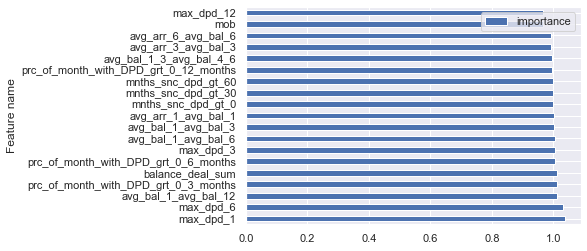

For 2018-05-31 month we have roc_auc_score 0.8554262096025971
For 2018-06-30 month we have roc_auc_score 0.856377402264765
For 2018-07-31 month we have roc_auc_score 0.854482347426986
For 2018-08-31 month we have roc_auc_score 0.8704162502460565
For 2018-09-30 month we have roc_auc_score 0.8627712716418341
For 2018-10-31 month we have roc_auc_score 0.8661834767144101
For 2018-11-30 month we have roc_auc_score 0.868635065562601
For 2018-12-31 month we have roc_auc_score 0.8762666090116333
For 2019-01-31 month we have roc_auc_score 0.8703931990133824
For 2019-02-28 month we have roc_auc_score 0.8583090519931618
For 2019-03-31 month we have roc_auc_score 0.8678716940140465
For 2019-04-30 month we have roc_auc_score 0.8599893503281105


,balance_deal_sum,mob,max_dpd_1,max_dpd_3,max_dpd_6,max_dpd_12,mnths_snc_dpd_gt_0,mnths_snc_dpd_gt_30,mnths_snc_dpd_gt_60,prc_of_month_with_DPD_grt_0_3_months,prc_of_month_with_DPD_grt_0_6_months,prc_of_month_with_DPD_grt_0_12_months,avg_bal_1_avg_bal_3,avg_bal_1_avg_bal_6,avg_bal_1_avg_bal_12,avg_bal_1_3_avg_bal_4_6,avg_arr_1_avg_bal_1,avg_arr_3_avg_bal_3,avg_arr_6_avg_bal_6
0,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
1,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
2,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
3,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
4,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
5,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
6,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
7,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
8,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076
9,1.010345,0.965793,1.036482,1.004431,1.031708,0.965032,1.000098,1.000073,1.000009,1.011996,1.006962,0.99665,1.001735,1.003828,1.012018,0.995956,1.001678,0.993095,0.993076


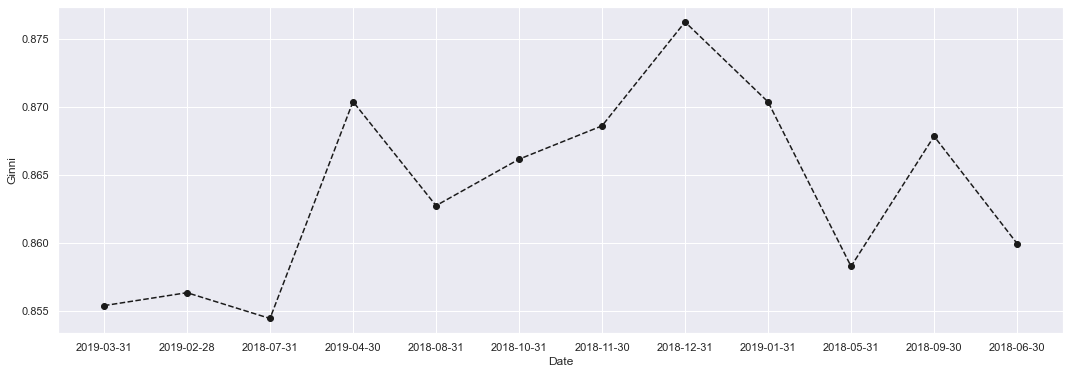

In [351]:
def ginni(df,z,X_train,rotation):
    dict = {}
    sorted_date =  sorted(df[z].unique())
    scores = []
    job = df.copy()
    job = df.drop(['RepDate_end','DealID'],axis = 1)
    complete = pd.DataFrame(columns = X_train.columns.values)
    for i in sorted_date: 
        
        dict[i] = [x for x in df.loc[df[z] == i].index]
        
        
        clon = pd.DataFrame(data = job , index = dict[i][0:])
        
        X_train = clon.drop('will_default',axis = 1)
        y_train = clon['will_default']
        y_pred = model.predict(X_train)
        roc_auc = roc_auc_score(y_train,y_pred)
        scores.append(roc_auc)
        print(f'For {i} month we have roc_auc_score {roc_auc}')
        a = model.coef_[0]
        j = pow(math.e, a)
        feature_importance = pd.DataFrame(columns = X_train.columns.values)
        df2 = pd.DataFrame([j],columns=feature_importance.columns)
        final_df = pd.concat([feature_importance,df2])
        

        new_row = {}
        for g in final_df.columns.values:
                    new_row[g] = final_df[g][0]

      
        complete = complete.append(new_row,ignore_index = True)

    x = np.array(df['RepDate_end'].unique())
    y = np.array(scores)
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle = '--',color = 'k')
    plt.xlabel('Date')
    plt.ylabel('Ginni')
    plt.xticks(rotation = rotation)
    
    return complete
        
feature_importance = pd.DataFrame(columns = ['Feature name'], data = X_train.columns.values)
feature_importance['Coefficient'] = model.coef_[0]
feature_importance["importance"] = pow(math.e, feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='Feature name', y='importance')
plt.show()


ginni(df,'RepDate_end',X_train,0)

# Dashboard distribution 

In [352]:
dist1= pd.concat([score,df['will_default']],axis = 1)
dist1.columns = ['Score','Status']
dist1 = dist1.reset_index(False)
dist = dist1.iloc[:,[1,2]]
score = round(Score)

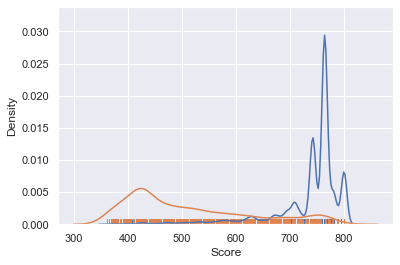

<Figure size 1152x648 with 0 Axes>

In [353]:
def dashboard(min1,max1,cut):
    list = [int(x) for x in np.linspace(min1,max1,cut)]
    for i in range(len(list)):
        if i < cut-1:
                a = (list[i]+list[i+1])/2
                dist.loc[dist['Score'].isin(range(list[i],list[i+1])),'Score'] = a
                i = i + 1
    dist['Score'] = round(dist['Score'],0)
    
    unique_vals = dist['Status'].unique()  
    targets = [dist.loc[dist['Status'] == val] for val in unique_vals]
    
    for target in targets:
        sns.distplot(target[['Score']], hist=False, rug=True)
    plt.ylabel('Density')
    plt.xlabel('Score')
    
    plt.figure(figsize=(16,9))
    
 
dashboard(361,801,405)

# PSI for every month

In [357]:
def PSI_m(df,z):
    dict = {}
    sorted_date =  sorted(df[z].unique())
    scores = []
    job = df.copy()
    job = df.drop([z,'DealID'],axis = 1)
    complete = pd.DataFrame(columns = X_train.columns.values)
    for i in sorted_date: 
        
        dict[i] = [x for x in df.loc[df[z] == i].index]
    
PSI_m(df,'RepDate_end')

{'2018-05-31': [20,
  22,
  38,
  39,
  50,
  94,
  100,
  106,
  120,
  127,
  141,
  142,
  158,
  183,
  192,
  199,
  203,
  204,
  214,
  215,
  221,
  233,
  243,
  270,
  271,
  279,
  285,
  302,
  303,
  308,
  309,
  315,
  338,
  344,
  354,
  356,
  357,
  409,
  423,
  429,
  431,
  437,
  438,
  468,
  476,
  478,
  495,
  504,
  511,
  512,
  524,
  529,
  531,
  540,
  544,
  571,
  592,
  598,
  599,
  604,
  610,
  612,
  621,
  633,
  641,
  658,
  664,
  665,
  668,
  682,
  686,
  705,
  724,
  733,
  749,
  757,
  803,
  804,
  815,
  816,
  817,
  826,
  828,
  846,
  859,
  875,
  889,
  892,
  906,
  920,
  953,
  962,
  973,
  983,
  992,
  1013,
  1017,
  1023,
  1047,
  1061,
  1089,
  1105,
  1106,
  1108,
  1119,
  1120,
  1128,
  1138,
  1141,
  1143,
  1153,
  1166,
  1172,
  1176,
  1201,
  1239,
  1240,
  1244,
  1248,
  1287,
  1298,
  1299,
  1300,
  1303,
  1310,
  1311,
  1332,
  1334,
  1374,
  1388,
  1393,
  1398,
  1409,
  1412,
  1421,
  1426,

In [ ]:
X_new.columns.values[X_new.shape[1] - 1] = 'Score'
first.columns.values[first.shape[1] - 1] = 'Score'

In [ ]:
X_new['Score:350-400'] = np.where((X_new['Score'] >= 351) & (X_new['Score'] < 400), 1, 0)
X_new['Score:400-450'] = np.where((X_new['Score'] >= 400) & (X_new['Score'] < 450), 1, 0)
X_new['Score:450-500'] = np.where((X_new['Score'] >= 450) & (X_new['Score'] < 500), 1, 0)
X_new['Score:500-550'] = np.where((X_new['Score'] >= 500) & (X_new['Score'] < 550), 1, 0)
X_new['Score:550-600'] = np.where((X_new['Score'] >= 550) & (X_new['Score'] < 600), 1, 0)
X_new['Score:600-650'] = np.where((X_new['Score'] >= 600) & (X_new['Score'] < 650), 1, 0)
X_new['Score:650-700'] = np.where((X_new['Score'] >= 650) & (X_new['Score'] < 700), 1, 0)
X_new['Score:700-750'] = np.where((X_new['Score'] >= 700) & (X_new['Score'] < 750), 1, 0)
X_new['Score:750-800'] = np.where((X_new['Score'] >= 750) & (X_new['Score'] < 800), 1, 0)

# We create dummy variables for score intervals in the dataframe with old ("expected").

In [ ]:
first['Score:300-350'] = np.where((first['Score'] >= 300) & (first['Score'] < 351), 1, 0)
first['Score:350-400'] = np.where((first['Score'] >= 351) & (first['Score'] < 400), 1, 0)
first['Score:400-450'] = np.where((first['Score'] >= 400) & (first['Score'] < 450), 1, 0)
first['Score:450-500'] = np.where((first['Score'] >= 450) & (first['Score'] < 500), 1, 0)
first['Score:500-550'] = np.where((first['Score'] >= 500) & (first['Score'] < 550), 1, 0)
first['Score:550-600'] = np.where((first['Score'] >= 550) & (first['Score'] < 600), 1, 0)
first['Score:600-650'] = np.where((first['Score'] >= 600) & (first['Score'] < 650), 1, 0)
first['Score:650-700'] = np.where((first['Score'] >= 650) & (first['Score'] < 700), 1, 0)
first['Score:700-750'] = np.where((first['Score'] >= 700) & (first['Score'] < 750), 1, 0)
first['Score:750-800'] = np.where((first['Score'] >= 750) & (first['Score'] < 800), 1, 0)
first['Score:800-850'] = np.where((first['Score'] >= 800) & (first['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

In [ ]:
PSI_calc_train = first.sum() / first.shape[0]
PSI_calc_new = X_new.sum() / X_new.shape[0]

In [ ]:
PSI = pd.concat([PSI_calc_train,PSI_calc_new],axis = 1)
PSI = PSI.reset_index()
PSI.columns = ['index', 'Proportions_Train', 'Proportions_New']
PSI['Original_name'] = PSI['index'].str.split(':').str[0]
PSI = PSI[np.array(['index', 'Original_name', 'Proportions_Train', 'Proportions_New'])]
PSI = PSI[(PSI['index'] != 'Intercept')]

PSI['Contribution'] = np.where((PSI['Proportions_Train'] == 0) | (PSI['Proportions_New'] == 0),
                               0, (PSI['Proportions_New'] - PSI['Proportions_Train']) * np.log(PSI['Proportions_New'] / PSI['Proportions_Train']))

# CREATING SCORECARD

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = X_train.columns.values)
summary_table['Coefficients'] = model.coef_.reshape(84,1)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace = True)

In [ ]:
summary_table

In [ ]:
y_hat_test = model.predict(X_test)
y_hat_test_proba = model.predict_proba(X_test) 
y_hat_test_proba = y_hat_test_proba[: , 1]

In [ ]:
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [ ]:
y_test_proba

In [ ]:
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
y_test_proba.index = X_test.index
y_test_proba

In [ ]:
tr = 0.5
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [ ]:
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
GINI = AUROC*2 - 1
AUROC , GINI

In [ ]:
no_skill = len(y_test[y_test == 1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [ ]:
auc_pr = auc(recall, precision)
auc_pr

In [ ]:
df_scorecard = summary_table.copy()
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [ ]:
min_score = 1
max_score = 751

min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

In [ ]:
df_scorecard.loc[0, 'Score - Calculation']

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

In [ ]:
score_card = df_scorecard.iloc[:,[0,4]]

In [ ]:
score_card

In [ ]:
X_test.insert(0, 'Intercept', 1)
y_scores = X_test.dot(score_card['Score - Preliminary'].values)

In [ ]:
y_scores

# HHI TEST (Herhindahl

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
def n_approved(p):
    return np.where(y_test_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = y_test_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / y_test_proba['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [ ]:
df_cutoffs

In [ ]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

In [ ]:
df_cutoffs.loc[df_cutoffs['thresholds'].between(0.27788,0.277890)]

In [ ]:
###CUT OF IS 490

#df_scorecard.to_csv('df_scorecard.csv')